# Shopify Summer 2022 - Data Science Challenge

By: Rayan Roy

****Note for SQL solution scroll down to the bottom at Question 2: SQL***

## Question 1: Python


### Business Problem

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. <br>
2. What metric would you report for this dataset? <br>
3. What is its value? <br>

**Please read 'Work and Explanation' section for a more detailed explanations** <br>

**Solution 1:** <br>

The orignal Average Order Value (AOV) was calculated by averaging the order_amount which led to a huge number of $3145.13. This is because the average (mean) is sensitive to outliers (extreme values). This was further confirmed by the high variance which indicates large variability between order amounts. <br>

To tackle the issue, I would recommend: <br>
1. To use the median, which is a more robust to outliers (i.e not affected by extreme values) <br>
2. Remove the outliers, and then calculate the average of the order amount. From our analysis (see below), Shop 42 and Shop 78 have the higest average order value. We remove Shop 78 because their products are really overpriced as compared to market. Lastly, shop 42 is removed because one of the customers (customer 607) is ordering really high order value items. We cannot really control the spending habits of a customer, so its best to remove the whole store.

**Solution 2:** <br>

A better metric would be to use Median as it is insensitive to outliers. However, when we do  calculate the average order value after removing shop 78 and shop 42, we do get similar results as median.


**Solution 3:** <br>

If we use the median as an estimate, then the AOV is $284.0. If we remove the outliers and calculate AOV, we get 300.15 dollars.

### Work and Explanation

We were told that we we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We are asked to do some analysis of the average order value (AOV). Ironically it was given to us that orders data over a 30 day window span had an AOV of **$3145.13**. This really seemed stranged because an average person would never buy such expensive shoes. 

**Import libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1a: Think about what could be going wrong with our calculation

Lets further explore the dataset to see how they might have come up with such a number and what are the better ways to evaluate this

**Exploratory Data Analysis**

In [7]:
shoes_df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv')
shoes_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [12]:
# Lets check for missing values
shoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


There are no missing values present in the dataset, and 5 variables that are numerical and 2 variables that non-numerical.

In [10]:
# Lets evaluate the current average order amount 
shoes_df[['order_amount', 'total_items']].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


We can see that that mean order value is $3145.13 which is what we were told. This is quite high given shoes are inexpensive in North America.

#### Hypothesis 
Look at the summary, we can see the AOV is quite large. Some interesting facts to notice are that the standard deviation is 41283, which is very high (as compared to mean). This indicates that calculating mean would not be an ideal value as there is a lot of variability. We also see that the order amount ranges from 90 to 704000, which in way too expensive. This indicates that there are many outlier present in the dataset, or there might be several shoe items that the user has bought. Lets verify by using a boxplot to measure the spread and scatterplot to visualize it.

#### Data Exploration

Text(0.5, 0, 'Order Amount ($)')

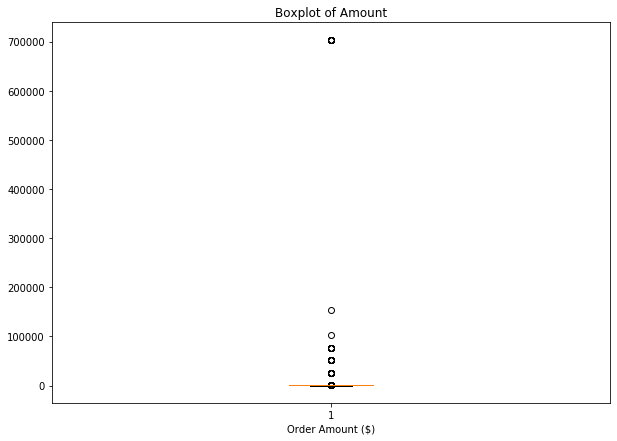

In [71]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(shoes_df['order_amount'])
plt.title("Boxplot of Amount")
plt.xlabel('Order Amount ($)')

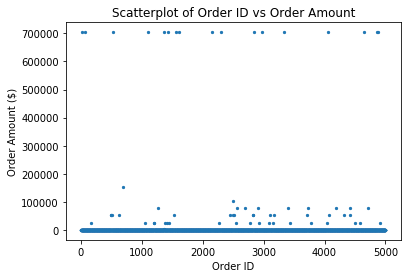

<Figure size 3600x1440 with 0 Axes>

In [72]:
plt.scatter(x=shoes_df['order_id'], y=shoes_df['order_amount'], s=5)
plt.title("Scatterplot of Order ID vs Order Amount")
plt.xlabel('Order ID')
plt.ylabel('Order Amount ($)')
plt.figure(figsize=(50,20))
plt.show()

There are a lot of outliers present in the dataset as shown by boxplot. We also see a large number 
outlier present especially in $700,000 range for "order_amount" from the scatterplot that is driving the mean price up.

In [73]:
shoes_set = shoes_df.groupby('order_amount').agg({'order_amount':'count'})
shoes_set.tail(10)

,order_amount
order_amount,
1064,1
1086,1
1408,2
1760,1
25725,19
51450,16
77175,9
102900,1
154350,1


As we can see there are a total 63 instances when an order amount of $25725 or above is made which makes me wonder that there might have been bulk orders going on. 

In [75]:
shoes_df.loc[shoes_df['order_amount'].isin([704000, 154350, 102900,77175, 51450, 25725])]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
...,...,...,...,...,...,...,...
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4715,4716,78,818,77175,3,debit,2017-03-05 5:10:44
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


**Solution 1:** Our assumptions were correct, that there were many bulk orders going on. We see that the items which has order amount of $700,400 had total order of 2000 items at once, and it was the same shop_id (Shop 42). However, we also see that many high end price purchases that were made were single items, especially in Shop 78. A baseline metric would be to divide the 'order_amount' by the total_item to get a price_per_item.

In [14]:
shoes_df['price_per_item'] = shoes_df['order_amount']/shoes_df['total_items']
shoes_df['price_per_item'].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: price_per_item, dtype: float64

*We can also look a bit further and investigate if Shop 42 usually sells high AOV items or whether its only the customer who is driving the high order value*

In [35]:
shoe42df = shoes_df[['shop_id', 'user_id', 'order_amount', 'total_items']]
shoe42df[shoe42df['shop_id'] == 42].head()

,shop_id,user_id,order_amount,total_items
15,42,607,704000,2000
40,42,793,352,1
60,42,607,704000,2000
308,42,770,352,1
409,42,904,704,2


In [44]:
sdf = shoe42df[shoe42df['shop_id'] == 42]
sdf.order_amount.unique()

array([704000,    352,    704,   1056,   1760,   1408])

We can see that Shop 42 had 6 different order amounts, but interestingly the order amount of $704000 by user_id 607 is way off than others. This indicates that there is no issue with the seller but rather the customer is driving prices up. Lets ensure that is the case

In [37]:
shoe42df[shoe42df['user_id'] == 607].head()

,shop_id,user_id,order_amount,total_items
15,42,607,704000,2000
60,42,607,704000,2000
520,42,607,704000,2000
1104,42,607,704000,2000
1362,42,607,704000,2000


Indeed user_id 607 is an anomaly and driving the prices high. Hence we would remove shop 42 even though the issue is caused by customer 607 in order to improve our model.

*Finally lets look into shop 78 and whether it really sells high end order items*

In [59]:
shop78 = shoes_df.groupby(shoes_df['shop_id'])['price_per_item'].mean().reset_index().sort_values(
    by=['price_per_item'], ascending = False)
shop78.head(5) 

,shop_id,price_per_item
77,78,25725.0
41,42,352.0
11,12,201.0
88,89,196.0
98,99,195.0


Our predictions were right that Shop 78 does sell high order value items since their price per item is extremely high. 

## 1b: Think about a way to tackle it? What metric will you use to evaluate?

Based on our previous analysis, we found the average was a great metric since it wasn't considering extreme values. Instead, we can remove the outliers, namely the order amount value from Shop 78 and Shop 42 and then take the average. <br>

If we don't want to remove or alter any of our data, then we can use the **median order amount** as a metric of evaluation which is insensitive to outliers.

## 1c: What is its value?

In [52]:
# The median value
shoes_df['price_per_item'] = shoes_df['order_amount']/shoes_df['total_items']
shoes_df['order_amount'].median()

284.0

In [58]:
# The average value without Shop 42 and 78 removed
shoes_df[(shoes_df['shop_id'] != 42) & (shoes_df['shop_id'] != 78)]['order_amount'].mean()

300.1558229655313

Based on the above analysis, using the median we get the AOV of **$284.0** which is a more accurate representation. This is also quite close to the average value with Shop 42 and 78 removed.

## Question 2 : SQL

**Please read 'Work and Explanation' section for a more detailed explanations**

***a: How many orders were shipped by Speedy Express in total?*** <br>
Ans: There were **54** orders that were shipped by Speedy Express <br>


***b: What is the last name of the employee with the most orders?*** <br>
Ans: The last name of the employees with most orders is **Peacock** with 40 orders <br>


***c: What product was ordered the most by customers in Germany?*** <br>
Ans: The product that most ordered by customers in Germany is **'Boston Crab Meat'** <br>

### Work and Explanation

***a: How many orders were shipped by Speedy Express in total?***


SELECT COUNT(*) <br>
FROM Orders AS o <br>
JOIN Shippers AS s <br>
on s.ShipperID = o.ShipperID <br>
WHERE s.ShipperName = 'Speedy Express';<br>

ANSWER: There were **54** orders that were shipped by Speedy Express

**Explanation:** <br>
We will break it down so its easier for the audience <br>

We first join the Orders and Shippers table on common key ShipperID since those two tables are of interest for us. We will next use COUNT function to count all the order that have been shipped. Finally we will filter them for only the shipper "Speedy Express".

***b: What is the last name of the employee with the most orders?***

Select emp.LastName FROM Employees AS emp <br>
JOIN <br>
(Select EmployeeID, COUNT(*) As TotalOrder <br>
FROM Orders <br>
GROUP BY EmployeeID <br>
ORDER BY TotalOrder DESC) AS o <br>
ON o.EmployeeID = emp.EmployeeID <br>
LIMIT 1; <br>

ANSWER: The last name of the employees with most orders is **Peacock** with 40 orders

**Explanation:** <br>

Lets start with the inner query (i.e one within the brackets). We first take the Order table and group it by EmployeeID. When the COUNT(*) is used with GROUP BY EmployeeID, it counts the total number of order (denoted by TotalOrder) each Employee would have. So if seller John sold 50 items to customers, and seller Melissa sold 30 items to customers, it will show John - 50 and Melissa - 30. Then I sort the TotalOrder in descending order in order to get the highest count of order on top of table.  <br>

We then join the Employees table with the inner query table we created on common key EmployeeID. This join will help get us the name of the Employee and TotalOrder (count of total orders). Finally a LIMIT is set to 1, in order to get the employee with highest amount of order.

***c: What product was ordered the most by customers in Germany?***

SELECT p.productName, SUM(ODE.Quantity) AS units_sold<br>
FROM Customers AS c <br>
JOIN Orders AS o <br>
ON o.CustomerID = c.CustomerID <br>
JOIN OrderDetails AS ODE <br>
ON o.OrderID = ODE.OrderID <br>
JOIN Products AS p <br>
ON p.ProductID = ODE.ProductID <br>
WHERE c.Country = 'Germany' <br>
GROUP BY p.ProductID <br>
ORDER BY units_sold DESC <br>
LIMIT 1; <br>


ANSWER: The product that most ordered by customers in Germany is **'Boston Crab Meat'** <br>
<br>
**Note this assumes the we are summing the quantity of product and not the number of purchases**

**Explanation:** <br>

This solution requires almost all the tables since we want the country name = Germany, the name of the product, total number of orders. <br> 
So we first join Customers table (which contains product names) with Orders table. Then we join the Orders table with OrderDetails Table. The reason we use Order table is because it acts like a bridge to connect Customers table with OrderDetails Table. Finally we connect the Products table with OrderDetails Table. <br> 
<br>
After all the connection, comes filtering. We will filter to get customers only from Germany (indicated by WHERE clause) and then GROUP BY productID in order to aggregate the sum of Order Quantity (Denoted by units_sold). We then sort the SUM of Order quantity in descending order so we get the product name which has the highest count of orders on the top. Finally the limit 1 helps grab the product which is ordered the most by customer in Germany.